In [12]:
import os
from PIL import Image
import time
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy import stats

Re-crop old images

In [7]:
ss,xx=31,161
t0 = time.time()
for i in range(ss,xx):
    L = 6144
    ti = time.time()
    imagebig = Image.open(f'saved/hdimage{i}.png')
    a,b,c,d = imagebig.getbbox()
    imagesm = imagebig.crop((a,b,c,d))
    xw = abs(c-a)
    yw = abs(d-b)
    xb = int(L/2-xw/2)
    yb = int(L/2-yw/2)
    imagebig = Image.new('RGBA', (6144,6144))
    imagebig.paste(imagesm,(xb,yb))
    imagebig.save(f'saved/hdimage{i}.png',"PNG")
    t1 = time.time()-t0
    est = round((xx-ss)*t1/(i+1-ss),2)
    print(f'# {i+1-ss} of {xx-ss}, time: {round(t1,2)} of {round((xx-ss)*t1/(i+1-ss),2)}        ',end='\r')

Analyze worldsummaries

In [34]:
#d = open('saved/worldsummary31.txt','r').readlines()
#BIOMES,EB,GB,SP,CS,Ustructure,ore_types,am,dm,gd,em,bn,cp,ir,cl,lp,rs,stone,soil,veggies,water,ores,sandy,snow = d[:23]
SPL,CSL,amL,dmL,gdL,emL,clL,irL,rsL,lpL,cpL,bnL,ot,winter= [],[],[],[],[],[],[],[],[],[],[],[],[],[]
BN = []
ustr = []
biom = []
for i in range(31,231):
    BIOMES,EB,GB,SP,CS,Ustructure,ore_types,am,dm,gd,em,bn,cp,ir,cl,lp,rs,stone,soil,veggies,water,ores,sandy,snow = open(f'saved/sample/worldsummary{i}.txt','r').readlines()
    SPL.append(float(SP))
    CSL.append(float(CS))
    amL.append(float(am))
    dmL.append(float(dm))
    if float(gd) < 0.09: # only got normal case.
        gdL.append(float(gd))
    if float(em) > 0:
        emL.append(float(em))
    if float(bn) > 0:
        bnL.append(float(bn))
    clL.append(float(cl))
    irL.append(float(ir))
    rsL.append(float(rs))
    lpL.append(float(lp))
    cpL.append(float(cp))
    ustr += eval(Ustructure)
    biom += eval(BIOMES)
    BN.append(len(eval(BIOMES)))
    ot.append(len(eval(ore_types)))
    if float(snow) >= 0.3:
        winter.append(float(snow))

print(len(winter)/200)

0.165


In [7]:
(np.array(SPL)>=35).sum()/200

0.015

SP,CS,am,em,cl,cp are log normal

gd, rs, lp, ir, dm is gumbel_l

0.8489826091789467 0.9709188878924522 1.0440210891255148 1.1814082000429735


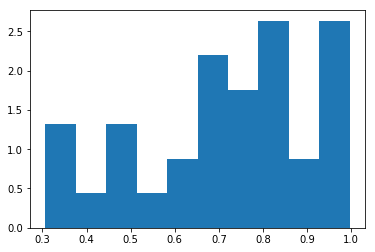

In [35]:


D = sorted(winter)
#print(len(D))
#plt.yscale('log')
shape, loc, scale = stats.lognorm.fit(D, loc=0)
#print(shape,loc,scale)
pdf_lognorm = stats.lognorm.pdf(D, shape, loc, scale)
print(stats.lognorm.ppf(0.75,shape,loc,scale),stats.lognorm.ppf(0.9,shape,loc,scale),stats.lognorm.ppf(0.95,shape,loc,scale),stats.lognorm.ppf(0.99,shape,loc,scale))
plt.hist(D,density=True)
#plt.plot(D, pdf_lognorm)

plt.savefig('see.png')
plt.show()


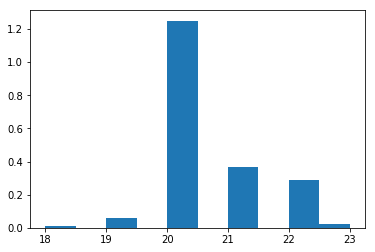

In [21]:
D = sorted(bnL)
plt.hist(ot,density=True)
plt.show()

In [9]:
def get_lognorm(dl):
    for d in dl:
        D = sorted(d)
        shape, loc, scale = stats.lognorm.fit(D, loc=0)
        print(stats.lognorm.ppf(0.75,shape,loc,scale),stats.lognorm.ppf(0.9,shape,loc,scale),stats.lognorm.ppf(0.95,shape,loc,scale),stats.lognorm.ppf(0.99,shape,loc,scale))
    pass

get_lognorm([SPL,CSL,amL,emL,clL,cpL,BN])

20.798376047090418 26.274671437360304 30.21856580532989 39.28133223049182
24.87356649807305 30.67987811454462 34.78232371537665 44.0109458092009
0.04857621968925925 0.057823652996992825 0.06392426595204993 0.07664649073272997
0.0013639611916549308 0.0029665996463801364 0.004724372701815549 0.01131236781573449
0.26593068907135825 0.29537521422845586 0.3145483112705915 0.3539644940800656
0.2687231518330518 0.31846280807652494 0.36423550792806686 0.503436168306424
9.258457832616084 10.80796755139652 11.801295494511187 13.808796180699936


SP,CS,am,em,cl,cp are log normal

gd, rs, lp, ir, dm is gumbel_l

0.839285635507627 0.9396179404331207 0.9916541407940193 1.0766800275614468


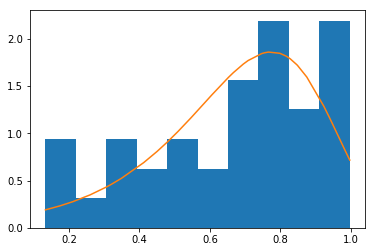

In [20]:
D = sorted(winter)

#plt.yscale('log')
loc, scale = stats.gumbel_l.fit(D, loc=0)
pdf = stats.gumbel_l.pdf(D, loc, scale)
#print(stats.gumbel_l.ppf(0.8,loc,scale))
print(stats.gumbel_l.ppf(0.75,loc,scale),stats.gumbel_l.ppf(0.9,loc,scale),stats.gumbel_l.ppf(0.95,loc,scale),stats.gumbel_l.ppf(0.99,loc,scale))
plt.hist(D,density=True)
plt.plot(D, pdf)
plt.show()

SP,CS,am,em,cl,cp are log normal

gd, rs, lp, ir, dm is gumbel_l

In [10]:
def get_gumbell(dl):
    for d in dl:
        D = sorted(d)
        loc, scale = stats.gumbel_l.fit(D, loc=0)
        print(stats.gumbel_l.ppf(0.75,loc,scale),stats.gumbel_l.ppf(0.9,loc,scale),stats.gumbel_l.ppf(0.95,loc,scale),stats.gumbel_l.ppf(0.99,loc,scale))
    pass

get_gumbell([dmL,gdL,rsL,irL,lpL])

0.043233439309139574 0.0457819696770163 0.04710373575173319 0.0492634693952825
0.07288259617026688 0.07699867624926922 0.07913343402097117 0.08262157633946775
0.10136153450402448 0.10704497540014286 0.10999262690111615 0.11480901781769662
0.22403459181578622 0.23550190876256766 0.24144930130665168 0.25116719618574657
0.06767660632708769 0.07107235386120928 0.07283351941194385 0.07571122112069459


['mineshaft', 'ruined_portal', 'village', 'ocean_ruin', 'shipwreck', 'buried_treasure', 'fossil', 'igloo', 'pillager_outpost', 'desert_pyramid', 'swamp_hut', 'jungle_pyramid', 'mansion'] [0.89  0.26  0.25  0.235 0.2   0.135 0.115 0.025 0.01  0.01  0.005 0.005
 0.005]
mineshaft ruined_portal village ocean_ruin shipwreck buried_treasure fossil igloo pillager_outpost desert_pyramid swamp_hut jungle_pyramid mansion 

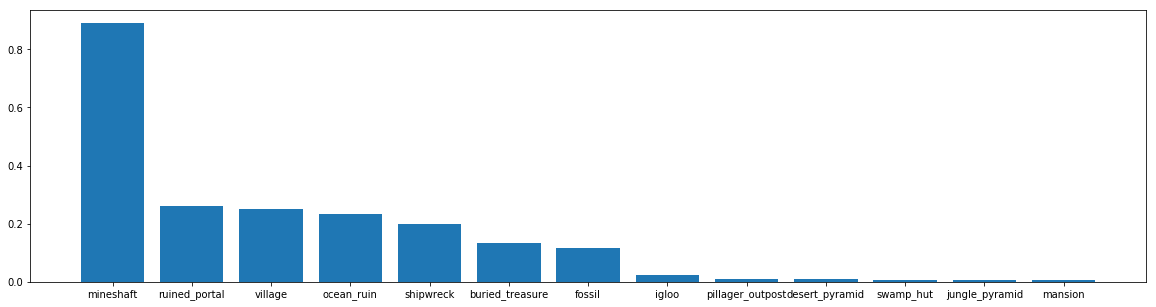

In [17]:
import pandas as pd
from collections import Counter
a = ustr
key = list(pd.Series(a).value_counts().keys())
key
values = pd.Series(a).value_counts().values/200

plt.figure(figsize=(20,5))
plt.bar(key,values)
print(key,values)
for k in key:
    print(k,end=' ')

['river', 'forest', 'plains', 'dripstone_caves', 'beach', 'lush_caves', 'taiga', 'stony_shore', 'ocean', 'savanna', 'cold_ocean', 'birch_forest', 'old_growth_birch_forest', 'lukewarm_ocean', 'frozen_river', 'snowy_plains', 'meadow', 'snowy_taiga', 'frozen_ocean', 'snowy_beach', 'jungle', 'deep_cold_ocean', 'desert', 'sparse_jungle', 'dark_forest', 'savanna_plateau', 'deep_ocean', 'old_growth_pine_taiga', 'swamp', 'old_growth_spruce_taiga', 'windswept_hills', 'warm_ocean', 'badlands', 'flower_forest', 'grove', 'deep_lukewarm_ocean', 'sunflower_plains', 'deep_frozen_ocean', 'snowy_slopes', 'bamboo_jungle', 'windswept_savanna', 'eroded_badlands', 'wooded_badlands', 'windswept_forest', 'windswept_gravelly_hills', 'stony_peaks', 'ice_spikes', 'frozen_peaks', 'jagged_peaks'] [0.865 0.675 0.6   0.51  0.46  0.435 0.27  0.25  0.23  0.22  0.21  0.21
 0.205 0.185 0.17  0.17  0.16  0.13  0.125 0.12  0.115 0.09  0.09  0.09
 0.09  0.08  0.075 0.075 0.07  0.07  0.065 0.065 0.06  0.06  0.055 0.055
 0.

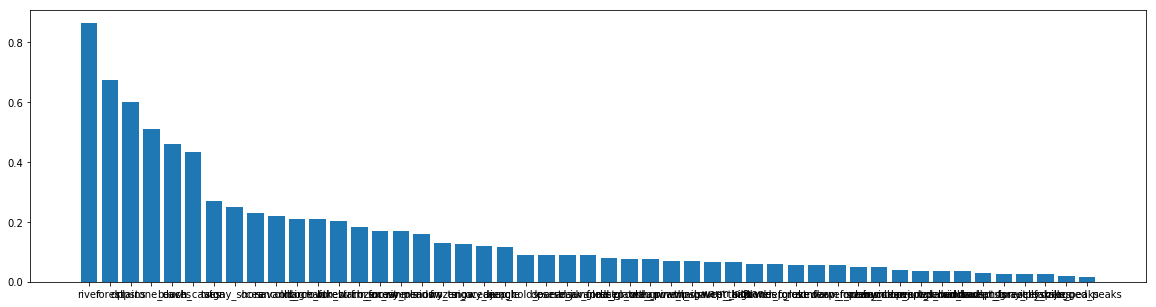

In [18]:
import pandas as pd
from collections import Counter
a = biom
key = list(pd.Series(a).value_counts().keys())
key
values = pd.Series(a).value_counts().values/200

plt.figure(figsize=(20,5))
plt.bar(key,values)
print(key,values)

for k in key:
    print(k,end=' ')

rarity reader

In [13]:
r_sp = np.float32(np.asarray('20.798376047090418 26.274671437360304 30.21856580532989 39.28133223049182'.split()))
r_cs = np.float32(np.asarray('24.87356649807305 30.67987811454462 34.78232371537665 44.0109458092009'.split()))
r_am = np.float32(np.asarray('0.04857621968925925 0.057823652996992825 0.06392426595204993 0.07664649073272997'.split()))
r_em = np.float32(np.asarray('0.0013639611916549308 0.0029665996463801364 0.004724372701815549 0.01131236781573449'.split()))
r_cl = np.float32(np.asarray('0.26593068907135825 0.29537521422845586 0.3145483112705915 0.3539644940800656'.split()))
r_cp = np.float32(np.asarray('0.2687231518330518 0.31846280807652494 0.36423550792806686 0.503436168306424'.split()))

r_dm = np.float32(np.asarray('0.043233439309139574 0.0457819696770163 0.04710373575173319 0.0492634693952825'.split()))
r_gd = np.float32(np.asarray('0.07288259617026688 0.07699867624926922 0.07913343402097117 0.08262157633946775'.split()))
r_rs = np.float32(np.asarray('0.10136153450402448 0.10704497540014286 0.10999262690111615 0.11480901781769662'.split()))
r_ir = np.float32(np.asarray('0.22403459181578622 0.23550190876256766 0.24144930130665168 0.25116719618574657'.split()))
r_lp = np.float32(np.asarray('0.06767660632708769 0.07107235386120928 0.07283351941194385 0.07571122112069459'.split()))

structures = 'mineshaft ruined_portal village ocean_ruin shipwreck buried_treasure fossil igloo pillager_outpost desert_pyramid swamp_hut jungle_pyramid mansion'.split()
str_p =      '0.89      0.26          0.25    0.235      0.2       0.135           0.115  0.025 0.01             0.01           0.005     0.005          0.005'.split()

biomes = 'river forest plains dripstone_caves beach lush_caves taiga stony_shore ocean savanna cold_ocean birch_forest old_growth_birch_forest lukewarm_ocean frozen_river snowy_plains meadow snowy_taiga frozen_ocean snowy_beach jungle deep_cold_ocean desert sparse_jungle dark_forest savanna_plateau deep_ocean old_growth_pine_taiga swamp old_growth_spruce_taiga windswept_hills warm_ocean badlands flower_forest grove deep_lukewarm_ocean sunflower_plains deep_frozen_ocean snowy_slopes bamboo_jungle windswept_savanna eroded_badlands wooded_badlands windswept_forest windswept_gravelly_hills stony_peaks ice_spikes frozen_peaks jagged_peaks'.split()
bio_p = '0.865 0.675 0.6   0.51  0.46  0.435 0.27  0.25  0.23  0.22  0.21  0.21 0.205 0.185 0.17  0.17  0.16  0.13  0.125 0.12  0.115 0.09  0.09  0.09 0.09  0.08  0.075 0.075 0.07  0.07  0.065 0.065 0.06  0.06  0.055 0.055 0.055 0.05  0.05  0.04  0.035 0.035 0.035 0.03  0.025 0.025 0.025 0.02 0.015'.split()

d_stru = {}
for i in range(len(structures)):
    d_stru[structures[i]] = str_p[i]

d_bio = {}
for i in range(len(biomes)):
    d_bio[biomes[i]] = bio_p[i]



In [14]:
r = [0,0,0,0]
r

[0, 0, 0, 0]

In [15]:
data,ref,Ri = 28, r_sp, 2
for p in ref:
    if p < data:
        r[Ri] += 1
r

[0, 0, 2, 0]

In [26]:
BIOMES,EB,GB,SP,CS,Ustructure,ore_types,am,dm,gd,em,bn,cp,ir,cl,lp,rs,stone,soil,veggies,water,ores,sandy,snow = open(f'saved/31-230/worldsummary40.txt','r').readlines()

In [34]:
summary = open(f'saved/31-230/worldsummary40.txt','r').readlines()

r_sp = np.float32(np.asarray('20.798376047090418 26.274671437360304 30.21856580532989 39.28133223049182'.split()))
r_cs = np.float32(np.asarray('24.87356649807305 30.67987811454462 34.78232371537665 44.0109458092009'.split()))
r_am = np.float32(np.asarray('0.04857621968925925 0.057823652996992825 0.06392426595204993 0.07664649073272997'.split()))
r_em = np.float32(np.asarray('0.0013639611916549308 0.0029665996463801364 0.004724372701815549 0.01131236781573449'.split()))
r_cl = np.float32(np.asarray('0.26593068907135825 0.29537521422845586 0.3145483112705915 0.3539644940800656'.split()))
r_cp = np.float32(np.asarray('0.2687231518330518 0.31846280807652494 0.36423550792806686 0.503436168306424'.split()))
r_bn = np.float32(np.asarray('0.0019807927869329393 0.0028622029291350314 0.0035210829777147503 0.005099698081662132'.split()))
r_dm = np.float32(np.asarray('0.043233439309139574 0.0457819696770163 0.04710373575173319 0.0492634693952825'.split()))
r_gd = np.float32(np.asarray('0.07288259617026688 0.07699867624926922 0.07913343402097117 0.08262157633946775'.split()))
r_rs = np.float32(np.asarray('0.10136153450402448 0.10704497540014286 0.10999262690111615 0.11480901781769662'.split()))
r_ir = np.float32(np.asarray('0.22403459181578622 0.23550190876256766 0.24144930130665168 0.25116719618574657'.split()))
r_lp = np.float32(np.asarray('0.06767660632708769 0.07107235386120928 0.07283351941194385 0.07571122112069459'.split()))

R = [0 for i in range(14)]
Index = ['Biome','Structures','Spawner','Chest','r_am','r_dm','r_gd','r_em','r_bn','r_cp','r_ir','r_cl','r_lp','r_rs']
structures                  = 'mineshaft ruined_portal village ocean_ruin shipwreck buried_treasure fossil igloo pillager_outpost desert_pyramid swamp_hut jungle_pyramid mansion'.split()
str_p = np.float32(np.asarray('0.89      0.26          0.25    0.235      0.2       0.135           0.115  0.025 0.01             0.01           0.005     0.005          0.005'.split()))

biomes = 'river forest plains dripstone_caves beach lush_caves taiga stony_shore ocean savanna cold_ocean birch_forest old_growth_birch_forest lukewarm_ocean frozen_river snowy_plains meadow snowy_taiga frozen_ocean snowy_beach jungle deep_cold_ocean desert sparse_jungle dark_forest savanna_plateau deep_ocean old_growth_pine_taiga swamp old_growth_spruce_taiga windswept_hills warm_ocean badlands flower_forest grove deep_lukewarm_ocean sunflower_plains deep_frozen_ocean snowy_slopes bamboo_jungle windswept_savanna eroded_badlands wooded_badlands windswept_forest windswept_gravelly_hills stony_peaks ice_spikes frozen_peaks jagged_peaks'.split()
bio_p = np.float32(np.asarray('0.865 0.675 0.6   0.51  0.46  0.435 0.27  0.25  0.23  0.22  0.21  0.21 0.205 0.185 0.17  0.17  0.16  0.13  0.125 0.12  0.115 0.09  0.09  0.09 0.09  0.08  0.075 0.075 0.07  0.07  0.065 0.065 0.06  0.06  0.055 0.055 0.055 0.05  0.05  0.04  0.035 0.035 0.035 0.03  0.025 0.025 0.025 0.02 0.015'.split()))

d_stru = {}
for i in range(len(structures)):
    d_stru[structures[i]] = str_p[i]

d_bio = {}
for i in range(len(biomes)):
    d_bio[biomes[i]] = bio_p[i]

R[0] = []
R[1] = []
for b in eval(summary[0]): #biomes
    p = d_bio[b]
    if 0.1 < p <= 0.25:
        R[0].append((b,1))
    elif 0.05 < p <= 0.1:
        R[0].append((b,2))
    elif 0.01 < p <= 0.05:
        R[0].append((b,3))
    elif p <= 0.01:
        R[0].append((b,4))
    else:pass
for s in eval(summary[5]): #structures
    p = d_stru[s]
    if 0.1 < p <= 0.25:
        R[1].append((s,1))
    elif 0.05 < p <= 0.1:
        R[1].append((s,2))
    elif 0.01 < p <= 0.05:
        R[1].append((s,3))
    elif p <= 0.01:
        R[1].append((s,4))
    else:pass
print(R)
data,ref,Ri = eval(summary[3]), r_sp, 2
for p in ref:
    if p < data:
        R[Ri] += 1
data,ref,Ri = eval(summary[4]), r_cs, 3
for p in ref:
    if p < data:
        R[Ri] += 1
print(R)
p_ores = [r_am,r_dm,r_gd,r_em,r_bn,r_cp,r_ir,r_cl,r_lp,r_rs]
for i in range(len(p_ores)):
    data,ref,Ri = eval(summary[i+7]), p_ores[i], i+4
    for p in ref:
        if p < data:
            R[Ri] += 1

print(R)

[[('meadow', 1)], [], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[('meadow', 1)], [], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[('meadow', 1)], [], 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]


In [37]:
l = ([1,2,3,4],5,6)

list(l)

[[1, 2, 3, 4], 5, 6]

In [38]:
area = eval("[[['area', '112896m²'], (255, 255, 255)], [['land coverage', '50.87%'], (255, 255, 255)], [['water coverage', '49.13%'], (255, 255, 255)], [['soil coverage', '23.33%'], (255, 255, 255)]]")

In [39]:
area

[[['area', '112896m²'], (255, 255, 255)],
 [['land coverage', '50.87%'], (255, 255, 255)],
 [['water coverage', '49.13%'], (255, 255, 255)],
 [['soil coverage', '23.33%'], (255, 255, 255)]]

In [41]:
f = open('text.txt','w', encoding='utf-8')
f.write(str(area))
f.close()

In [42]:
test_texts = [[['area', '112896m²'], (255, 255, 255)], [['land', '50.87%'], (255, 255, 255)], [['water', '49.13%'], (255, 255, 255)], [['soil', '23.33%'], (255, 255, 255)]],\
                 [['lukewarm_ocean', (51, 255, 51)], ['swamp', (0, 128, 255)], ['windswept_savanna', (255, 51, 255)], ['warm_ocean', (0, 128, 255)], ['savanna', (51, 255, 51)], ['forest', (255, 255, 255)], ['beach', (255, 255, 255)], ['river', (255, 255, 255)]],\
                 [[['Amethyst', '6.05%'], (0, 128, 255)], [['Diamond', '3.97%'], (255, 255, 255)], [['Gold', '7.03%'], (255, 255, 255)], [['Emerald', '0.0%'], (255, 255, 255)], [['Bone', '0.0%'], (255, 255, 255)], [['Copper', '21.33%'], (255, 255, 255)], [['Iron', '22.61%'], (51, 255, 51)], [['Coal', '22.76%'], (255, 255, 255)], [['Lapis', '6.53%'], (255, 255, 255)], [['Redstone', '9.72%'], (255, 255, 255)]],\
                 [['ocean_ruin', (51, 255, 51)], ['mineshaft', (255, 255, 255)], ['more metal', (51, 255, 51)], ['more gem', (51, 255, 51)], ['multiclimate', (51, 255, 51)], ['uncommon biomes', (255, 128, 0)], ['corals', (0, 128, 255)]]

[[['area', '112896m²'], (255, 255, 255)],
 [['land', '50.87%'], (255, 255, 255)],
 [['water', '49.13%'], (255, 255, 255)],
 [['soil', '23.33%'], (255, 255, 255)]]